### Importing the dependencies

In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report , accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = pd.read_csv('bioresearch.csv')
pd.set_option('display.max_columns', 500)   #to make sure all columns get displayed
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Analysis:
1. Diagnosis tells about the type of cancer as B or M ('Benign', 'Malignant')
2. Type of cancer is based on the rest of the variables hence "Diagnosis" is the output variable (y)
3. Encoding of Diagnosis variable needs to be done
4. All other variables are in numerical form, hence no encoding is needed.
5. Since it is a Random Forest model, feature scaling is NOT necessary here.
6. The last column Unnamed is completely empty so it can be removed.


In [3]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
columns = ['diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

# classes = ['Benign', 'Malignant']cancer.shape
cancer.shape

(569, 33)

In [5]:
# Encoding of output variable
cancer['diagnosis'] = cancer['diagnosis'].map({'B':0 , 'M':1})

In [6]:
#Since the last column does not make sense, lets remove it!

cancer = cancer.drop(['id','Unnamed: 32'], axis = 1)
cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
#Assigning independent and dependent variables:

feature_space = cancer.iloc[:, cancer.columns != 'diagnosis']
feature_class = cancer.iloc[:, cancer.columns == 'diagnosis']


x_train, x_test, y_train, y_test = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

In [8]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier()

use GridSearchCV for hyper-parameter tuning in machine learning


In [9]:
# Providing the different values of hyperparameters & finding best parameters
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}


In [10]:
#Finally the best parameters are specified

fit_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  bootstrap = True,
                  max_depth = 4)


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [11]:
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2')>

In [12]:
fit_rf.fit(x_train, y_train)
y_pred = fit_rf.predict(x_test)

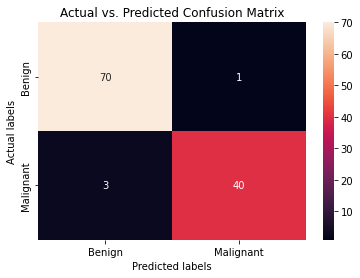

In [13]:
cm=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign','Malignant']); ax.yaxis.set_ticklabels(['Benign','Malignant']);

plt.show()

In [14]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.9649122807017544

In [15]:
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test,predictions_prob)
auc(fpr,tpr)

0.99737962659679

In [16]:
#  To crossvalidate the dataset

from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, x_train, y_train, cv=5)
scores

array([0.96703297, 0.93406593, 0.97802198, 0.95604396, 0.94505495])

In [17]:
scores.mean()

0.956043956043956